In [20]:
import pandas as pd
import numpy as np
import datetime

# Read from source
sales = pd.read_csv('sales.csv')
user_registration = pd.read_csv('user_registration.csv')

# Simple transformation
user_registration['house_age'] = user_registration['registration_date'] \
                                .apply(lambda p: datetime.datetime.strptime(p, '%Y-%m-%d %H:%M:%S').year) \
                                - user_registration['house_build_date']

sales['week_number'] = sales['date'].apply(lambda p: datetime.datetime.strptime(p, '%Y-%m-%d').isocalendar()[1])

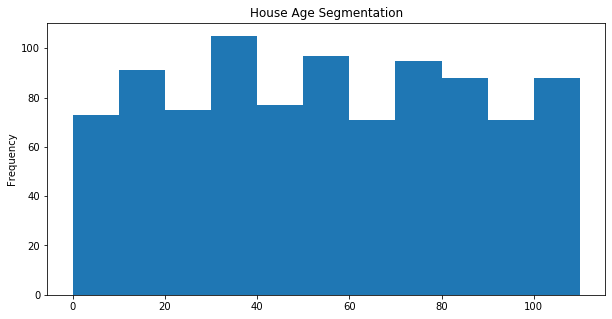

In [32]:
age_bins = np.arange(start=0, stop=120, step=10)
user_registration['house_age'].plot(kind='hist',bins=age_bins, figsize=[10,5], title='House Age Segmentation')

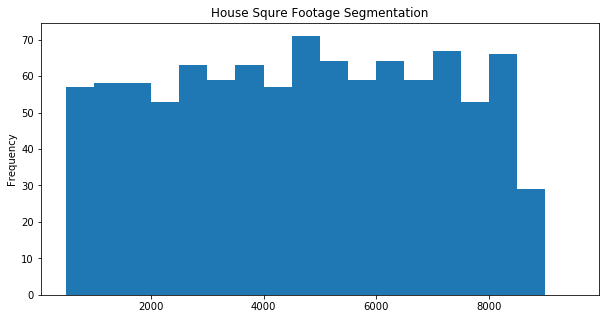

In [34]:
footage_bins = np.arange(start=500, stop=10000, step=500)
user_registration['house_square_footage'].plot(kind='hist', bins=footage_bins, figsize=[10,5], title='House Squre Footage Segmentation')

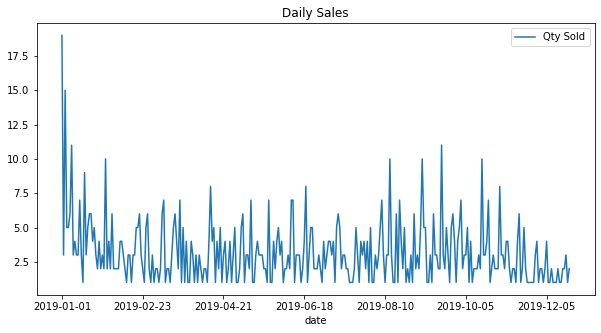

In [29]:
daily_sales_count = sales.groupby('date').count()['thermostat_serial'].reset_index(name='Qty Sold')
daily_sales_count.plot(kind='line', x='date', y='Qty Sold', figsize=[10,5], title='Daily Sales')

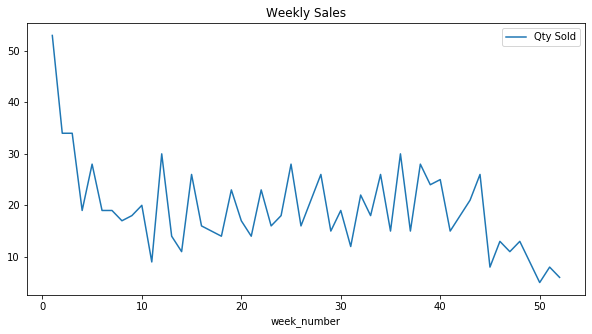

In [30]:
weekly_sales_count = sales.groupby('week_number').count()['thermostat_serial'].reset_index(name='Qty Sold')
weekly_sales_count.plot(kind='line', x='week_number', y='Qty Sold', figsize=[10,5], title='Weekly Sales')